# Titanic EDA and Modeling Project

## 📌 Introduction
This project performs data cleaning, exploratory data analysis (EDA), and a basic predictive model on the Titanic dataset. The goal is to understand patterns in survival and build a logistic regression model to predict survival on unseen test data.


---

## 📦 Step 1: Importing Libraries
We start by importing essential Python libraries for data manipulation, visualization, and modeling.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
### Style settings for plots
sns.set(style='whitegrid')
plt.style.use('ggplot')

---

## 📂 Step 2: Load Datasets
We load the training, test, and sample submission files using pandas.


In [7]:
train_df = pd.read_csv(r"C:\Users\user\Downloads\train.csv")
test_df = pd.read_csv(r"C:\Users\user\Downloads\test.csv")
gender_submission = pd.read_csv(r"C:\Users\user\Downloads\gender_submission.csv")

In [8]:
# Make a working copy of train set
df = train_df.copy()

---

## 🔍 Step 3: Data Cleaning
We handle missing values and convert categorical variables into numeric form.


In [10]:
# Fill missing 'Embarked' with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [11]:
# Fill missing 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [12]:
# Drop 'Cabin' due to high % of missing values
df.drop('Cabin', axis=1, inplace = True)

In [13]:
# Convert 'Sex' to binary
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [14]:
# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True, dtype=int)

---

## 📊 Step 4: Exploratory Data Analysis (EDA)
We analyze the distribution and relationships between key variables and the survival outcome.


In [16]:
# Dataset Information Summary
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_Q   891 non-null    int32  
 11  Embarked_S   891 non-null    int32  
dtypes: float64(2), int32(2), int64(6), object(2)
memory usage: 76.7+ KB


In [17]:
# Preview of the Dataset
pd.set_option('display.max_rows', None)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.00,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.00,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.00,0,0,373450,8.0500,0,1
5,6,0,3,"Moran, Mr. James",0,28.00,0,0,330877,8.4583,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.00,0,0,17463,51.8625,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.00,3,1,349909,21.0750,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.00,0,2,347742,11.1333,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.00,1,0,237736,30.0708,0,0


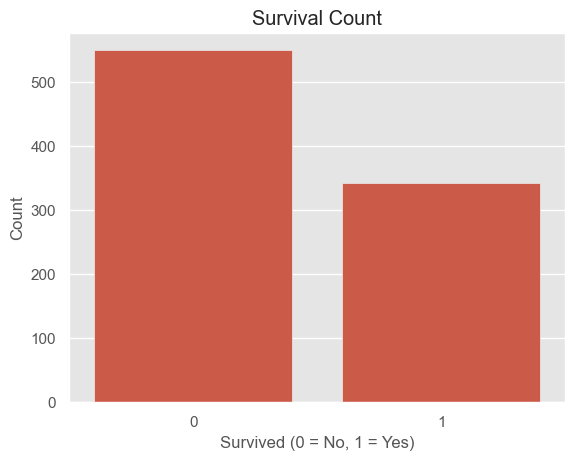

In [18]:
# Survival counts
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

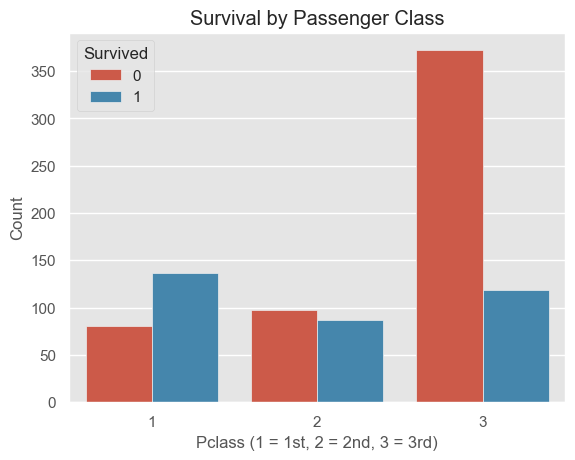

In [19]:
# Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Pclass (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Count')
plt.show()

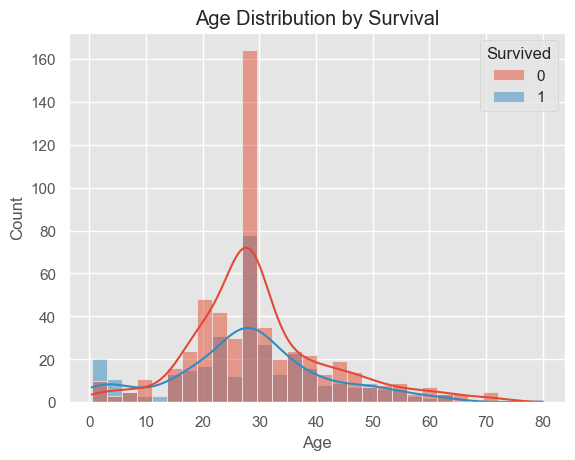

In [20]:
# Age distribution by Survival
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.show()

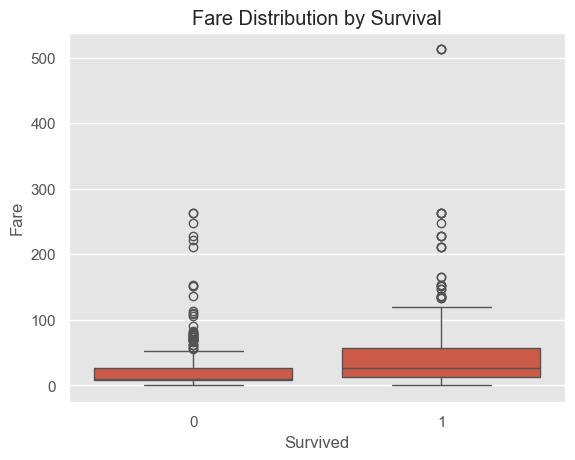

In [21]:
# Fare distribution
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival')
plt.show()

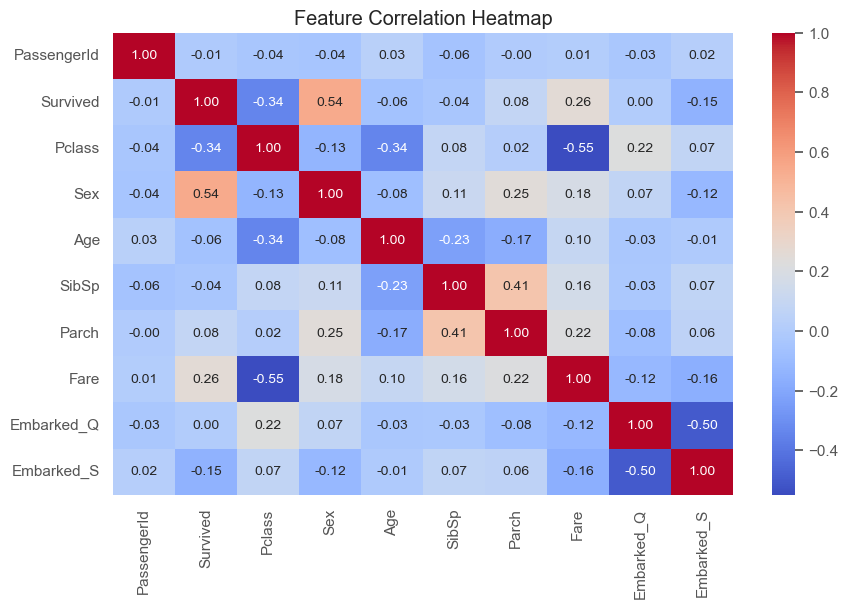

In [22]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

---

## 🔁 Additional Analysis: Family Size and Survival
Let’s see if having family on board influenced survival.


In [24]:
# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

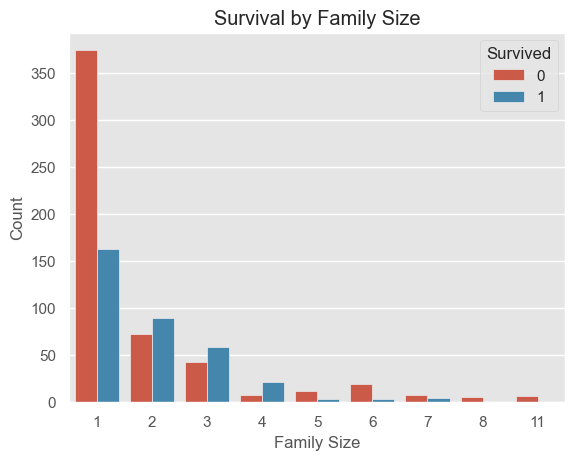

In [25]:
# Plot Survival by Family Size
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

## 🔍 Pairplot for Numeric Features
Visualizing combinations of numeric features can help spot clusters or separation between survivors and non-survivors.

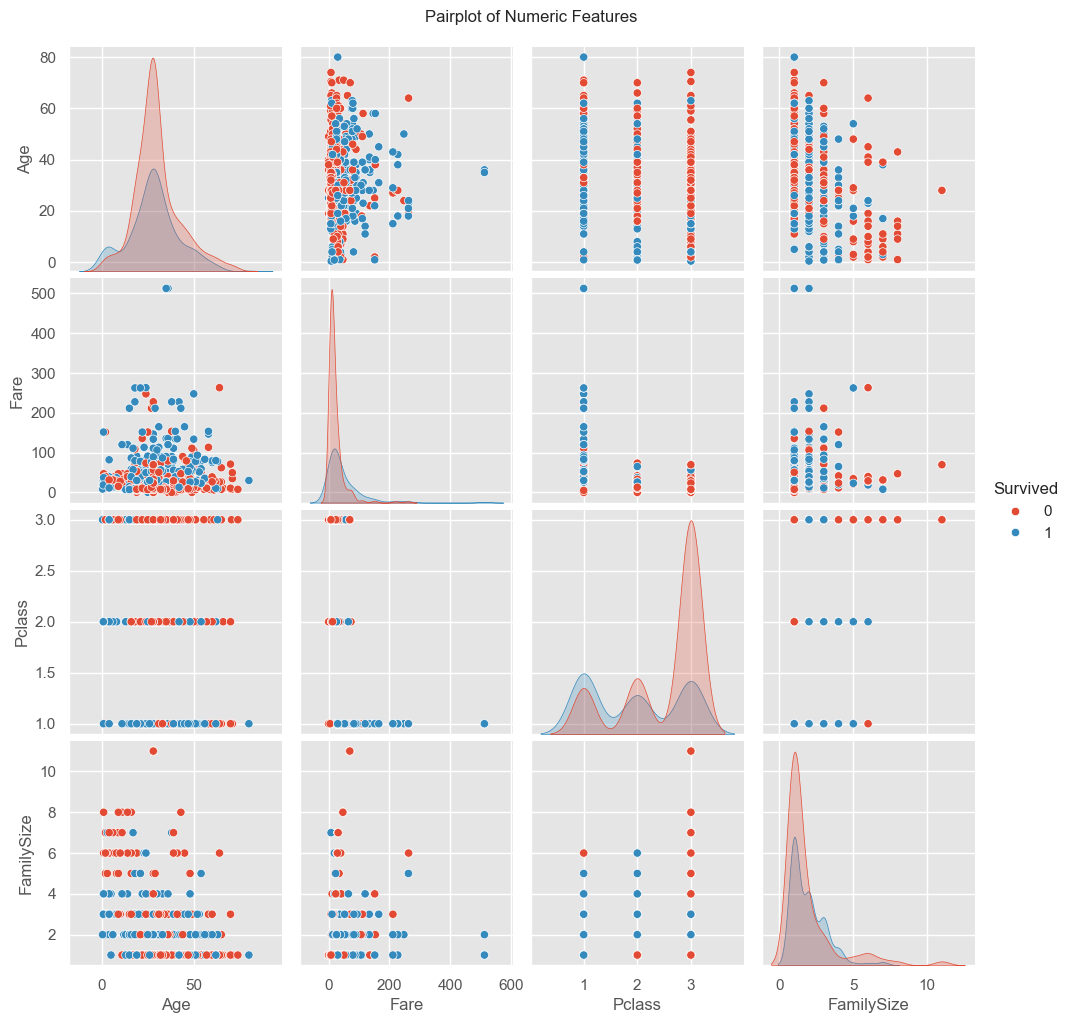

In [27]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass', 'FamilySize']], hue='Survived')
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

## ✅ Summary
- Cleaned missing values in Age and Embarked
- Dropped Cabin due to excessive missing data
- Converted categorical data (Sex, Embarked) to numerical format
- Explored patterns in survival across multiple features
- Identified trends through visualizations like countplots, histograms, and heatmaps
- Added extra insights through Family Size and pairplot analysis

The dataset is now clean and well-understood. Ready for model building or further feature engineering if desired.
